In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.abspath(''), '../'))
from pprint import pprint
from dataset.data_loader import DataLoader, playtime_forever_users_games_edge_scoring_function, LinearNormalizer, GaussianNormalizer, PercentileNormalizer
from utils.utils import print_game_name_and_scores

from models.ncf_model import NCFModel

In [2]:
data_loader = DataLoader(cache_local_dataset=True, users_games_edge_scoring_function = playtime_forever_users_games_edge_scoring_function, score_normalizers = [GaussianNormalizer(1.0, 1.0)], user_game_edge_embeddings = ['playtime_forever', 'playtime_2weeks'], game_embeddings=['name'])
data_loader.load_random_train_test_split(train_percentage=0.9, test_percentage=0.1, seed=0)
data_loader.save_data_loader_parameters('test_ncf_data_loader', overwrite=True)

Known Game Embeddings:  []
Known User Embeddings:  []
Total Learnable Parameters: 11340200


Training: 100%|██████████| 40/40 [03:12<00:00,  4.80s/it]


1.3808858e-05
              user_id  game_id  playtime_forever source     score train_split
4   76561198880605436     4000              1295  local  1.206198        True
5   76561198880605436      550               106  local  0.631309        True
6   76561198880605436   105600              1669  local  1.387030        True
7   76561198880605436   227300               185  local  0.669506        True
8   76561198880605436   211500                61  local  0.609551       False
9   76561198880605436   236390                 1  local  0.580541        True
10  76561198880605436   218620                 0  local  0.580057        True
11  76561198880605436   271590              7249  local  4.084995        True
12  76561198880605436   284160               231  local  0.691747        True
13  76561198880605436   293760              1573  local  1.340613        True
14  76561198880605436   386360               262  local  0.706736        True
15  76561198880605436   416590               228  

ValueError: too many values to unpack (expected 2)

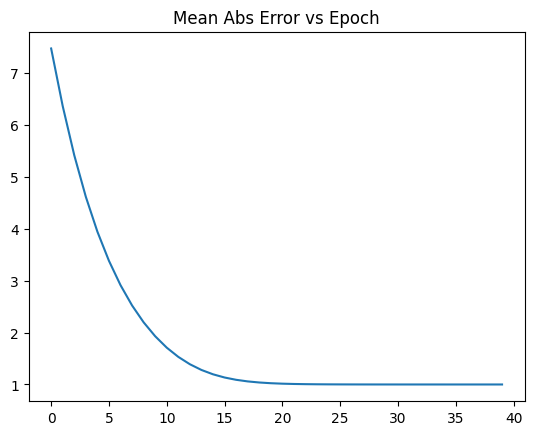

In [3]:
# base collaborative filter test
cf_model = NCFModel(num_epochs = 40, embedding_size = 100, batch_percent = 0.1, learning_rate = 1e-2, weight_decay=1e-3, mlp_hidden_layer_sizes = [], seed=0, model_type='cf', fine_tune_num_epochs=1, fine_tune_learning_rate=1e-1, fine_tune_weight_decay=1e-5)
cf_model.set_data_loader(data_loader)
cf_model.train(debug=True)
cf_model.save('test_cf_model', overwrite=True)
print(cf_model.get_score_between_user_and_game(76561198880605436, 967050))
print(cf_model.score_and_predict_n_games_for_user(76561198880605436)[:10])
print(cf_model.score_and_predict_n_games_for_user(76561198880605436)[-10:])
print('Test Loss', cf_model.test_loss())

Known Game Embeddings:  []
Known User Embeddings:  []
Total Learnable Parameters: 11340301


Training: 100%|██████████| 40/40 [14:34<00:00, 21.86s/it]


0.70597327
[(229480, 1.346836), (492600, 1.2492095), (2229350, 1.2368684), (1281190, 1.2354189), (1842610, 1.2267547), (388900, 1.2261814), (737380, 1.219301), (842510, 1.2147899), (328310, 1.2034427), (360970, 1.1956581)]
[(208200, 0.43849725), (678800, 0.4368711), (645630, 0.42987695), (1727270, 0.42860356), (1736840, 0.4244921), (2588590, 0.4144491), (358260, 0.4087724), (378070, 0.3923778), (630080, 0.39132765), (375930, 0.3867215)]
Test Loss 0.2547321915626526


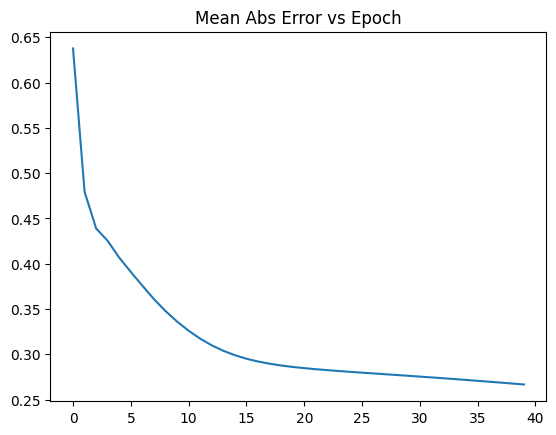

In [3]:
# generalized collaborative filter test
gcf_model = NCFModel(num_epochs = 40, embedding_size = 100, batch_percent = 0.1, learning_rate = 1e-3, mlp_hidden_layer_sizes = [], seed=0, model_type='gcf', fine_tune_num_epochs=1, fine_tune_learning_rate=1e-1, fine_tune_weight_decay=1e-5)
gcf_model.set_data_loader(data_loader)
gcf_model.train(debug=True)
gcf_model.save('test_gcf_model', overwrite=True)
print(gcf_model.get_score_between_user_and_game(76561198880605436, 967050))
print(gcf_model.score_and_predict_n_games_for_user(76561198880605436)[:10])
print(gcf_model.score_and_predict_n_games_for_user(76561198880605436)[-10:])
print('Test Loss', gcf_model.test_loss())

Known Game Embeddings:  []
Known User Embeddings:  []
Total Learnable Parameters: 11399081


Training: 100%|██████████| 40/40 [40:32<00:00, 60.80s/it]


0.8340055
[(615490, 1.0547082), (1337590, 1.0247288), (2388430, 1.0163636), (592570, 1.014163), (713500, 1.013082), (1091500, 1.0128273), (798170, 1.0113983), (531140, 1.0089062), (1820740, 1.0051131), (2375190, 1.0038261)]
[(709560, 0.8038294), (459840, 0.80380493), (787620, 0.8030879), (424840, 0.8017356), (288610, 0.8014674), (542410, 0.80118245), (1001270, 0.8003447), (588980, 0.7985176), (439700, 0.7918845), (407530, 0.7849404)]
Test Loss 0.1930522322654724


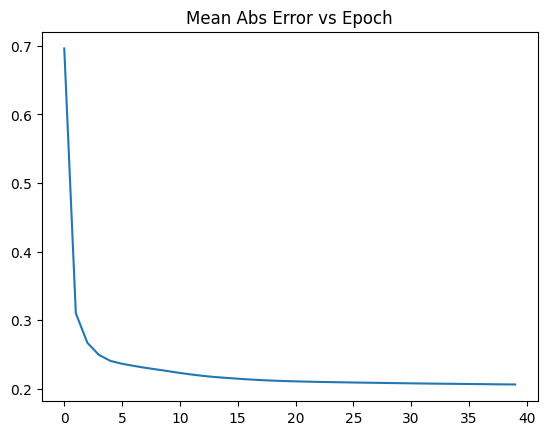

In [4]:
# mlp test
mlp_model = NCFModel(num_epochs = 40, embedding_size = 100, batch_percent = 0.1, learning_rate = 1e-3, weight_decay=1e-3, mlp_hidden_layer_sizes = [128, 128, 128], seed=0, model_type='mlp', fine_tune_num_epochs=1, fine_tune_learning_rate=1e-1, fine_tune_weight_decay=1e-5)
mlp_model.set_data_loader(data_loader)
mlp_model.train(debug=True)
mlp_model.save('test_mlp_model', overwrite=True)
print(mlp_model.get_score_between_user_and_game(76561198880605436, 967050))
print(mlp_model.score_and_predict_n_games_for_user(76561198880605436)[:10])
print(mlp_model.score_and_predict_n_games_for_user(76561198880605436)[-10:])
print('Test Loss', mlp_model.test_loss())

Known Game Embeddings:  []
Known User Embeddings:  []
Total Learnable Parameters: 22739381


Training: 100%|██████████| 40/40 [1:26:00<00:00, 129.00s/it]


0.82280076
[(2146180, 1.2310467), (921780, 1.2092412), (418190, 1.2010572), (815030, 1.1907902), (204030, 1.1545674), (1955800, 1.1476262), (1451720, 1.1156657), (552350, 1.11445), (652600, 1.1111959), (469920, 1.103363)]
[(235070, 0.79751), (250520, 0.7974302), (976030, 0.7972898), (97110, 0.7966955), (428210, 0.79652715), (516430, 0.7959233), (1094730, 0.792199), (2096820, 0.7911787), (466240, 0.7910533), (407530, 0.7898907)]
Test Loss 0.18954771757125854


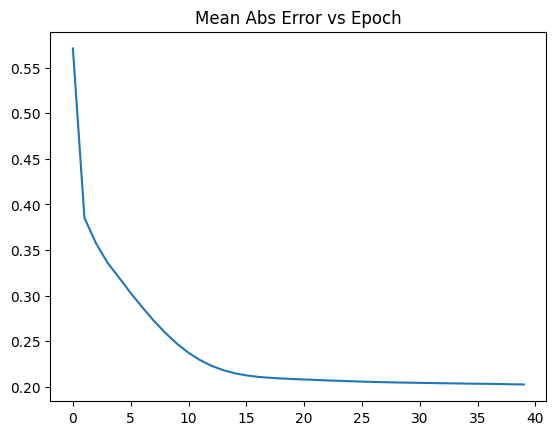

In [5]:
# ncf test
ncf_model = NCFModel(num_epochs = 40, embedding_size = 100, batch_percent = 0.1, learning_rate = 1e-3, weight_decay=1e-3, mlp_hidden_layer_sizes = [128, 128, 128], seed=0, model_type='ncf', fine_tune_num_epochs=1, fine_tune_learning_rate=1e-1, fine_tune_weight_decay=1e-5)
ncf_model.set_data_loader(data_loader)
ncf_model.train(debug=True)
ncf_model.save('test_ncf_model', overwrite=True)
print(ncf_model.get_score_between_user_and_game(76561198880605436, 967050))
print(ncf_model.score_and_predict_n_games_for_user(76561198880605436)[:10])
print(ncf_model.score_and_predict_n_games_for_user(76561198880605436)[-10:])
print('Test Loss', ncf_model.test_loss())

In [13]:
# test_user = 76561199048589805 # Only 1 game
# test_user = 76561198835352289 # Only 4 games
# test_user = 76561198880605436 # ~20 games
test_user = 76561199040442492 # ~400 games
# model = cf_model
model = gcf_model
# model = mlp_model
# model = ncf_model
print_game_name_and_scores(data_loader.games_df, model.score_and_predict_n_games_for_user(test_user)[:10])
print_game_name_and_scores(data_loader.games_df, model.score_and_predict_n_games_for_user(test_user)[-10:])

            id                               name     score
2149     25000                         Overgrowth  1.768024
4648    433790      Wooden Floor 2 - Resurrection  1.756974
9491    987840                  Expeditions: Rome  1.667641
11069   822140              Glaive: Brick Breaker  1.664009
12283   626660                     Flipping Death  1.660923
15492   780290                         Gloomhaven  1.654980
18419  1202220     Egypt Solitaire. Match 2 Cards  1.618330
23770   706850                            Devader  1.610805
24530   570950                          Devilated  1.607618
32695   585040  Dry Erase: Infinite VR Whiteboard  1.599888
            id                         name     score
8404    437530               A Blind Legend  0.519732
11646   467220                    Dyna Bomb  0.519629
14198  1648300                Costume Party  0.519329
14437  1986760  Police Stories: The Academy  0.515553
17320  1550510                Creepy Tale 2  0.512871
24408  1101190  

In [ ]:
# Test Fine Tuning
data_loader = DataLoader.load_from_file('test_ncf_data_loader', load_live_data_loader=True)
